Coefficients: 
 [938.23786125]


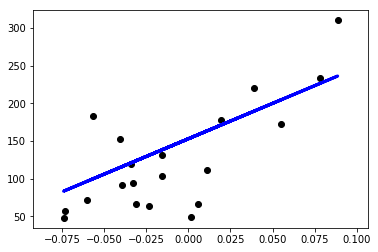

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error , r2_score

diabetes = datasets.load_breast_cancer()

diabetes_X = diabetes.data[:, np.newaxis, 2]

diabetes_X_train = diabetes_X[: -20]
diabetes_X_test = diabetes_X[-20: ]

diabetes_Y_train = diabetes.target[: -20]
diabetes_Y_test = diabetes.target[-20: ]

regr=LogisticRegression()
classification_model(model,data,prediction_var,"diagnosis")
regr.fit(diabetes_X_train , diabetes_Y_train)

diabetes_y_pred = regr.predict(diabetes_X_test)
print('Coefficients: \n' , regr.coef_)

plt.scatter(diabetes_X_test , diabetes_Y_test , color="black")
plt.plot(diabetes_X_test , diabetes_y_pred , color="blue" , linewidth=3)

plt.xticks()
plt.yticks()

plt.show()

After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473
minimized Cost:  112.61481011613473


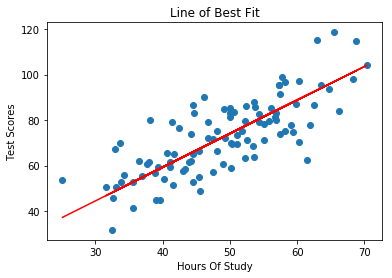

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]

        totalError += (y - (m * x + b)) ** 2

    return totalError / float(len(points))



def step_gradient(b_current, m_current, points, learning_rate):
 
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]

        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))

    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)

    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
 
    b = starting_b
    m = starting_m

    for i in range(num_iterations):
        b, m = step_gradient(b,m, points, learning_rate)

    return (b, m)

def run():
    points = np.genfromtxt('data.csv',delimiter=',')
    learning_rate = 0.0001

    #y = mx + b (slope formula)

    initial_b = 0
    initial_m = 0 # ideal slope, will start with 0

    num_iterations = 1000
    
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    print("minimized Cost: " , compute_error_for_line_given_points(b , m , points))
    
    x = points[:,0]
    y = points[:,1]
    plt.scatter(x , y)
    pred = m * x + b
    plt.plot(x , pred, c='r')
    plt.xlabel('Hours Of Study')
    plt.ylabel('Test Scores')
    plt.title('Line of Best Fit')
    plt.show()

run()